In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

In [2]:
train = pd.read_csv("final_train.csv")

In [3]:
y = train.LoanStatus
X = train.drop('LoanStatus',axis=1)

In [4]:
X = pd.get_dummies(X)

## Check cross validation scores with different algorithms 

In [5]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f%%' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

[0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
The accuracy of LogisticRegression is 80.78%


In [7]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of GaussianNB is %.2f%%' % (scores.mean()*100))
all_scores['GaussianNB'] = scores.mean() * 100

[0.80487805 0.75609756 0.77235772 0.84552846 0.81147541]
The accuration of GaussianNB is 79.81%


In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of DecisionTreeClassifier is %.2f%%' % (scores.mean()*100))
all_scores['DecisionTreeClassifier'] = scores.mean() * 100

[0.66666667 0.68292683 0.67479675 0.70731707 0.7295082 ]
The accuration of DecisionTreeClassifier is 69.22%


In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=10)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of RandomForestClassifier is %.2f%%' % (scores.mean()*100))
all_scores['RandomForestClassifier'] = scores.mean() * 100

The accuration of RandomForestClassifier is 75.41%


In [10]:
from sklearn.svm import SVC
clf = SVC()
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of SVC is %.2f%%' % (scores.mean()*100))
all_scores['SVC'] = scores.mean() * 100

The accuration of SVC is 68.73%


In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of KNN is %.2f%%' % (scores.mean()*100))
all_scores['KNN'] = scores.mean() * 100

The accuration of KNN is 70.68%


In [12]:
all_scores

{'LogisticRegression': 80.78368652538984,
 'GaussianNB': 79.80674396907904,
 'DecisionTreeClassifier': 69.22431027588964,
 'RandomForestClassifier': 75.40983606557377,
 'SVC': 68.72984139677463,
 'KNN': 70.67972810875649}

[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'KNN')]

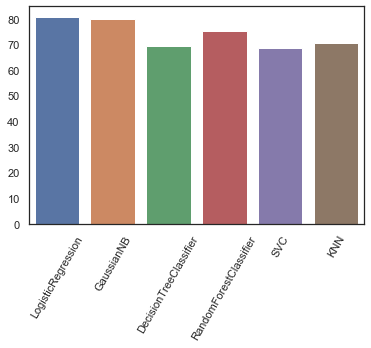

In [13]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logestic Regression with built-in Cross Validation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, max_iter=500, random_state=0).fit(X, y)

In [16]:
score = clf.score(X,y)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8094462540716613


In [18]:
# Take first 100 rows as test data 
X_test = X[:100]
y_test = y[:100]
y_pred = clf.predict(X_test)

In [19]:
confusion_matrix(y_test,y_pred)

array([[15, 21],
       [ 0, 64]], dtype=int64)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        36
           1       0.75      1.00      0.86        64

    accuracy                           0.79       100
   macro avg       0.88      0.71      0.72       100
weighted avg       0.84      0.79      0.76       100



## Deployment

In [ ]:
pd.to_pickle(clf,'lr_model_final.pkl')